## Prathmesh Deshmukh 

## K- Means Clustering
 k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids

In [1]:
##importing all the required libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
##importing the data set 

from sklearn import datasets
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns = iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### By plotting the data points we can see there are 3 different clusters so here we can easily identify, that the value of k should be 3 but in case if there are lot more data points and high dimentions in data set then we need to plot an elbow method to check the optimal number of clusters in our problem


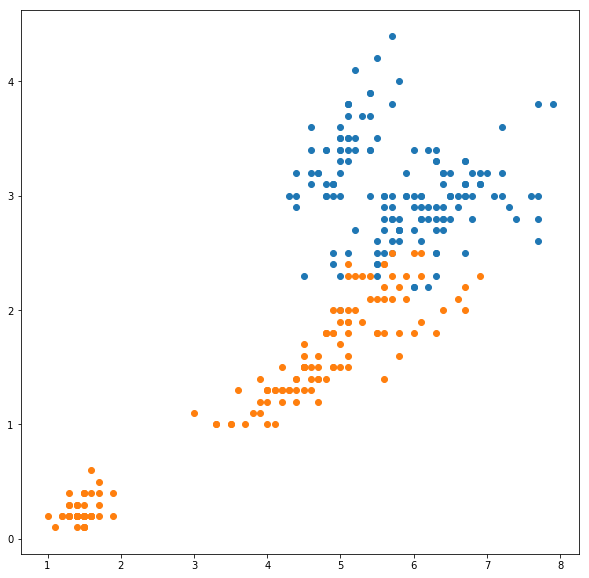

In [4]:
plt.figure(figsize=(10,10))
plt.scatter(x=df["sepal length (cm)"], y=df["sepal width (cm)"])
plt.scatter(x=df["petal length (cm)"], y=df["petal width (cm)"])
plt.show()

### now by using the elbow method we will find out the optimal value of k ie clusters in our problem

In [5]:
from sklearn.cluster import KMeans

In [6]:
df2=df.iloc[:,:].values

In [7]:
k_cluster_range=range(1, 11)
error_list=[]
for i in k_cluster_range:
    km=KMeans(n_clusters=i)
    km.fit(df2)
    error_list.append(km.inertia_)

In [8]:
##checking error rates value and plotting them 
error_list



[680.8244,
 152.36870647733906,
 78.94084142614602,
 57.47327326549492,
 46.56163015873016,
 38.930963049671746,
 34.41245574586445,
 30.324232174688056,
 28.067797315406015,
 26.216157641354574]

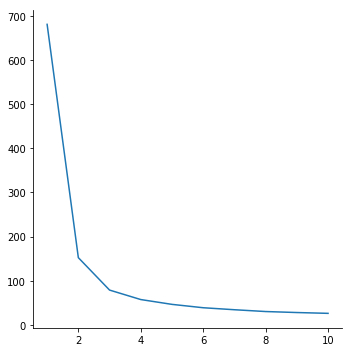

In [9]:
##plotting the elbow point to get the optimal no. of clusters

sns.relplot(x=k_cluster_range,y=error_list,kind="line")

#### Here we can clearly see elbow point is at 3 so we decide the number of cluster as 3

In [10]:
## predicting the values
km=KMeans(n_clusters=3)
y_predict=km.fit_predict(df2)


In [11]:
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

In [12]:
df["cluster"]=y_predict

### If our clusters are not getting well separated due to axis then we can use minmax scaler and adjust the values  between 0 and 1 to get the perfect result .Theres the following code for minmax scaler

In [ ]:
##from sklearn.preprocessing import MinMaxScaler
##scaler=MinMaxScaler()
##scaler.fit(df[["sepal length (cm)"]])
##df["sepal length (cm)"]=scaler.transform(df[["sepal length (cm)"]])

##scaler=MinMaxScaler()
##scaler.fit(df[["sepal width (cm)"]])
##df["sepal width (cm)"]=scaler.transform(df[["sepal width (cm)"]])

## plotting the clusters and centreoid using matplotlib

In [13]:

km.cluster_centers_

array([[5.006     , 3.418     , 1.464     , 0.244     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [14]:
## creating new data frames conisiting of different clusters each
df4=df[df.cluster==0]
df5=df[df.cluster==1]
df6=df[df.cluster==2]

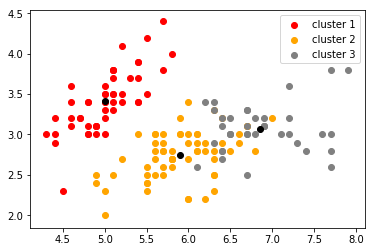

In [15]:
plt.scatter(df4["sepal length (cm)"],df4["sepal width (cm)"],color="red",label='cluster 1')
plt.scatter(df5["sepal length (cm)"],df5["sepal width (cm)"],color="orange",label='cluster 2')
plt.scatter(df6["sepal length (cm)"],df6["sepal width (cm)"],color="grey",label='cluster 3')
plt.legend()
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color="black",marker="o",)